In [1]:
import pandas as pd

r_cols = ['user_id','movie_id','rating']
ratings = pd.read_csv('C:/Users/hp/MachineLearningProjects/Maths ML/u.data',sep="\t",names=r_cols,usecols=range(3))

m_cols = ['movie_id','title']
movies= pd.read_csv('C:/Users/hp/MachineLearningProjects/Maths ML/u.item', sep="|", names=m_cols, encoding='latin-1',usecols=range(2))

ratings = pd.merge(movies,ratings)

In [2]:
ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [3]:
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
movieRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
movieRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
starWarsRatings = movieRatings['Toy Story (1995)']
starWarsRatings.head()

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: Toy Story (1995), dtype: float64

In [6]:
similarMovies = movieRatings.corrwith(starWarsRatings)
similarMovies = similarMovies.dropna()
df = pd.DataFrame(similarMovies)
df.head(10)

C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,0
title,
'Til There Was You (1997),0.534522
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857
2 Days in the Valley (1996),0.162728
"20,000 Leagues Under the Sea (1954)",0.328472
2001: A Space Odyssey (1968),-0.069060
"39 Steps, The (1935)",0.150055
8 1/2 (1963),-0.117259


<AxesSubplot:xlabel='title'>

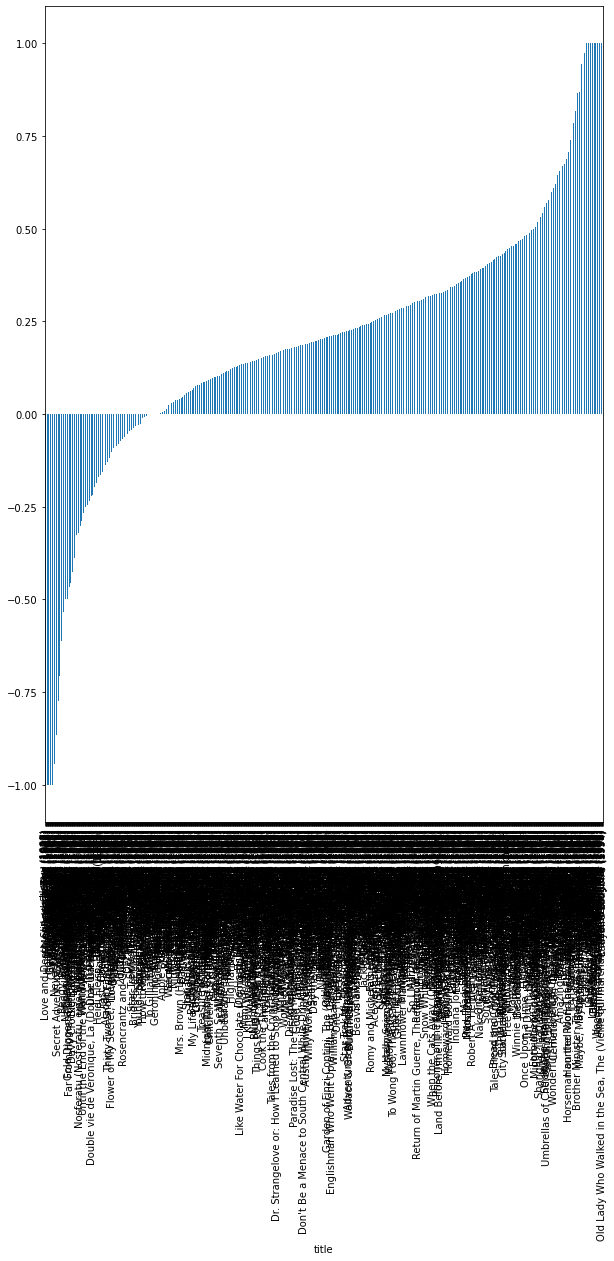

In [7]:
similarMovies.sort_values().plot(kind="bar", figsize=[10,15])
# similarMovies.order(ascending=False)

In [8]:
import numpy as np

In [9]:
similarMovies.sort_values(ascending=False)


title
Ladybird Ladybird (1994)                                                             1.0
Albino Alligator (1996)                                                              1.0
Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)    1.0
Critical Care (1997)                                                                 1.0
Late Bloomers (1996)                                                                 1.0
                                                                                    ... 
Feast of July (1995)                                                                -1.0
Love and Death on Long Island (1997)                                                -1.0
Slingshot, The (1993)                                                               -1.0
Stalker (1979)                                                                      -1.0
Heavy (1995)                                                                        -1.0
Length: 1370, d

In [10]:
movieStats = ratings.groupby('title').agg({'rating':[np.size,np.mean]})
movieStats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [11]:
popularMovies = movieStats['rating']['size'] >= 100
movieStats[popularMovies].sort_values([('rating','mean')],ascending= False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          584  4.359589
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

In [12]:
df = movieStats[popularMovies].join(pd.DataFrame(similarMovies,columns=['similarity']))

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [13]:
df.head()

,"(rating, size)","(rating, mean)",similarity
title,,,
101 Dalmatians (1996),109,2.908257,0.232118
12 Angry Men (1957),125,4.344000,0.334943
2001: A Space Odyssey (1968),259,3.969112,-0.069060
Absolute Power (1997),127,3.370079,0.318580
"Abyss, The (1989)",151,3.589404,0.329058


In [14]:
df.sort_values(['similarity'],ascending= False)[:15]

,"(rating, size)","(rating, mean)",similarity
title,,,
Toy Story (1995),452,3.878319,1.000000
"Craft, The (1996)",104,3.115385,0.549100
Down Periscope (1996),101,2.702970,0.457995
Miracle on 34th Street (1994),101,3.722772,0.456291
G.I. Jane (1997),175,3.360000,0.454756
Amistad (1997),124,3.854839,0.449915
Beauty and the Beast (1991),202,3.792079,0.442960
"Mask, The (1994)",129,3.193798,0.432855
Cinderella (1950),129,3.581395,0.428372


In [15]:
import pandas as pd

r_cols = ['user_id','movie_id','rating']
ratings = pd.read_csv('C:/Users/hp/MachineLearningProjects/Maths ML/u.data',sep="\t",names=r_cols,usecols=range(3))

m_cols = ['movie_id','title']
movies= pd.read_csv('C:/Users/hp/MachineLearningProjects/Maths ML/u.item', sep="|", names=m_cols, encoding='latin-1',usecols=range(2))

ratings = pd.merge(movies,ratings)
ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [16]:
userRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
userRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
corrMatrix = userRatings.corr()
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000,-0.500000,-0.500000,0.522233,NaN,-0.426401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-0.981981,NaN,NaN,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),-1.0,NaN,1.000000,-0.049890,0.269191,0.048973,0.266928,-0.043407,NaN,0.111111,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,0.000000,0.707107,NaN,NaN
12 Angry Men (1957),-0.5,NaN,-0.049890,1.000000,0.666667,0.256625,0.274772,0.178848,NaN,0.457176,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,0.144338,1.000000,1.0,NaN
187 (1997),-0.5,NaN,0.269191,0.666667,1.000000,0.596644,NaN,-0.554700,NaN,1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,0.475327,NaN,NaN,NaN


In [18]:
corrMatrix = userRatings.corr(method='pearson',min_periods = 100)
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
myRatings = userRatings.loc[0].dropna()
myRatings

title
Empire Strikes Back, The (1980)    5.0
Gone with the Wind (1939)          1.0
Star Wars (1977)                   5.0
Name: 0, dtype: float64

In [20]:
simCandidates = pd.Series()
for i in range(0,len(myRatings.index)):
    print("Adding sims for"+myRatings.index[i]+"...")
    sims = corrMatrix[myRatings.index[i]].dropna()
    sims = sims.map(lambda x: x * myRatings[i])
    simCandidates = simCandidates.append(sims)
    
print("Sorting...")
simCandidates.sort_values(inplace = True,ascending = False)
print(simCandidates.head())

Adding sims forEmpire Strikes Back, The (1980)...
Adding sims forGone with the Wind (1939)...
Adding sims forStar Wars (1977)...
Sorting...
Empire Strikes Back, The (1980)    5.000000
Star Wars (1977)                   5.000000
Empire Strikes Back, The (1980)    3.741763
Star Wars (1977)                   3.741763
Return of the Jedi (1983)          3.606146
dtype: float64


<ipython-input-20-82725ef6ae4c>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  simCandidates = pd.Series()


In [21]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()


In [22]:
simCandidates.sort_values(inplace = True,ascending = False)
simCandidates.head(10)

Empire Strikes Back, The (1980)              8.877450
Star Wars (1977)                             8.870971
Return of the Jedi (1983)                    7.178172
Raiders of the Lost Ark (1981)               5.519700
Indiana Jones and the Last Crusade (1989)    3.488028
Bridge on the River Kwai, The (1957)         3.366616
Back to the Future (1985)                    3.357941
Sting, The (1973)                            3.329843
Cinderella (1950)                            3.245412
Field of Dreams (1989)                       3.222311
dtype: float64

In [23]:
filteredSims = simCandidates.drop(myRatings.index)
filteredSims.head(10)

Return of the Jedi (1983)                    7.178172
Raiders of the Lost Ark (1981)               5.519700
Indiana Jones and the Last Crusade (1989)    3.488028
Bridge on the River Kwai, The (1957)         3.366616
Back to the Future (1985)                    3.357941
Sting, The (1973)                            3.329843
Cinderella (1950)                            3.245412
Field of Dreams (1989)                       3.222311
Wizard of Oz, The (1939)                     3.200268
Dumbo (1941)                                 2.981645
dtype: float64

In [26]:
import pandas as pd 
r_cols = ['user_id','movie_id','rating']
ratings = pd.read_csv('C:/Users/hp/MachineLearningProjects/Maths ML/u.data',sep = '\t', names = r_cols,usecols = range(3))
ratings.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [27]:
movieProperties = ratings.groupby('movie_id').agg({'rating': [np.size,np.mean]})
movieProperties.head()

rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [28]:
movieNumRatings = pd.DataFrame(movieProperties['rating']['size'])
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x)-np.min(x)))
movieNormalizedNumRatings.head()

,size
movie_id,
1,0.773585
2,0.222985
3,0.152659
4,0.356775
5,0.145798


In [29]:
movieDict = {}
with open(r'C:/Users/hp/MachineLearningProjects/Maths ML/u.item') as f:
    temp = ''
    for line in f:
        fields = line.rstrip('\n').split('|')
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = map(int, genres)
        movieDict[movieID] = (name, np.array(list(genres)), movieNormalizedNumRatings.loc[movieID].get('size'), movieProperties.loc[movieID].rating.get('mean'))


In [30]:
movieDict[1]

('Toy Story (1995)',
 array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 0.7735849056603774,
 3.8783185840707963)

In [31]:
from scipy import spatial

def ComputeDistance(a,b):
    genresA = a[1]
    genresB = b[1]
    genresDistance = spatial.distance.cosine(genresA,genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genresDistance + popularityDistance

ComputeDistance(movieDict[2],movieDict[4])

0.8004574042309892

In [32]:
print(movieDict[2])
print(movieDict[4])


('GoldenEye (1995)', array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 0.22298456260720412, 3.2061068702290076)
('Get Shorty (1995)', array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 0.3567753001715266, 3.550239234449761)


In [33]:
import operator

def getNeighbors(moviID,K):
    distances=[]
    for movie in movieDict:
        if (movie!= movieID):
            dist = ComputeDistance(movieDict[movieID],movieDict[movie])
            distances.append((movie,dist))
    distances.sort(key = operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

K= 10
avgRating = 0
neighbors = getNeighbors(1,K)
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print(movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))
    
avgRating /= float(K)
    

Substance of Fire, The (1996) 4.0
Other Voices, Other Rooms (1997) 3.0
Very Natural Thing, A (1974) 1.0
Walk in the Sun, A (1945) 3.0
Homage (1995) 1.0
August (1996) 1.0
Low Life, The (1994) 1.0
Hedd Wyn (1992) 1.0
Lotto Land (1995) 1.0
Every Other Weekend (1990) 1.0
